In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = r"C:\Users\91849\Desktop\final_year_project\TK14876\DATASET\Alzheimer_s Dataset\train"

In [5]:
valid_path =  r"C:\Users\91849\Desktop\final_year_project\TK14876\DATASET\Alzheimer_s Dataset\test"

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 8s 0us/step


In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
classifiers=[]
for file in os.listdir(train_path):
    classifiers+=[file]
print(classifiers)
print(len(classifiers))

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
4


In [12]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(classifiers), activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8061 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4387 images belonging to 4 classes.


In [22]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-22-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
252/252 [==============================] - 1846s 7s/step - loss: 0.8210 - accuracy: 0.6571 - val_loss: 0.8285 - val_accuracy: 0.6455
Epoch 2/5
252/252 [==============================] - 1877s 7s/step - loss: 0.5962 - accuracy: 0.7441 - val_loss: 0.6098 - val_accuracy: 0.7319
Epoch 3/5
252/252 [==============================] - 1898s 8s/step - loss: 0.5053 - accuracy: 0.7783 - val_loss: 0.9123 - val_accuracy: 0.6196
Epoch 4/5
252/252 [==============================] - 1880s 7s/step - loss: 0.4413 - accuracy: 0.8085 - val_loss: 0.6101 - val_accuracy: 0.7310
Epoch 5/5
252/252 [==============================] - 1853s 7s/step - loss: 0.4419 - accuracy: 0.8155 - val_loss: 0.5768 - val_accuracy: 0.7591


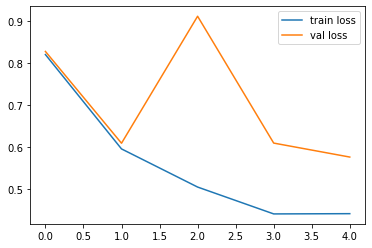

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

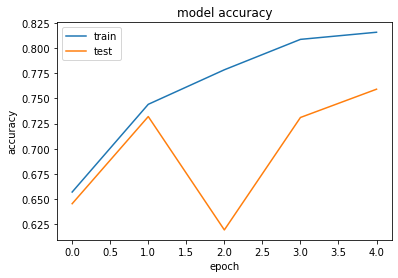

In [25]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
import tensorflow as tf

from keras.models import load_model

model.save('VGG16.h5')